## 식기세척기 리뷰 데이터 감성 분류&긍정/부정 키워드 분석

-한국어 텍스트 데이터 전처리
kolnpy 설치
정규표현식 적용/ 한국어 형태소 분석(명사 단위)/ 불용어 사전/ word count/ tf-idf 적용
-감성분류(logistic regression)
데이터셋 생성/ training set-test set 나누기 / 모델 학습 / (샘플링 재조정)/ 모델 재학습
-긍정/부정 키워드 분석(학습된 logistic regression 모델을 이용해 긍/부정 키워드 추출)
장,단점 파악할 수 있고, 유지,개선점 확인 가능!

### 1. 필요한 라이브러리 불러오기

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("삼성리뷰(모음).csv",encoding='utf-8')

In [3]:
df.head()

,rating,content
0,5,주문하고 사전방문하고 제품배송까지 일주일도안걸린거같네요..빠른배송에<em>만족했고요...
1,5,구매전에 엄청 고민했어요..<em>돈을 좀 들이더라도 더 크고</em> 비싼걸 살것...
2,5,"싱크대 하부장 하나 빼고, 하난 폭을 3cm 줄여서 시공했어요 비규격장이라 9만원 ..."
3,5,한달 사용 후 가장 많이 들어본 질문 위주로 후기를 적어볼게요. <br>우선 소음 ...
4,5,저녁에 퇴근후 어린아이들 씻기고 재우기 바쁜데 설거지까지 하려니 매번 힘들었는데 주...


### 2. 정규 표현식 적용 & 한국어 명사 형태소 추출하기

In [4]:
import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [5]:
apply_regular_expression(df['content'][0])

'주문하고 사전방문하고 제품배송까지 일주일도안걸린거같네요빠른배송에만족했고요 제품받자마자 테스트하려고쌓아놓은설겆이를해봤는데 세척은 정말잘되네요제가 손설겆이할때 박박문지르고 틈새까지하는편이라그정도까지는아니지만 뽀드득거리고좋아요배달짬뽕그릇을 혹시나하고돌려봤는데 아주말끔히세척이되서나와버려서다시써야할정도더군요이정도면 설겆이걱정없이 맡길수있을정도고요다만 처음부터자동으로열리는기능이안되서 삼성서비스신청했는데빠른시간안에 처리해주셔서그나마다행이라생각되네요수평이안맞아서 문짝이기우뚱거려안열린거였다는데좀더써봐야할거같고요자동문열림기능이좋긴한데조금더열렸음하는바램이있네요자동문열림기능이안되다보니꿉꿉한냄새도나고 그릇들은세척은잘되었지만 물자국이남더라고요추후에 자동문열림기능이 고장나거나 수평이틀어지면이부분은 문제가될듯싶네여그리고 저희집주방이 많이협소한데 크기가 딱 알맞게나와서 빌트인은아니고 스텐딩으로해놨는데맞춤인것처럼 보기도좋고요 작동소음도 그리 큰편은아닌것같아요타사인용보다조용한것같고요돌려놓고 다른일하거나 잠을자도거슬릴정도는아니더군요저렴한가격에 좋은제품구매하게되어 너무만족스럽네요고장없이 오래썼음하는바램입니다'

In [6]:
from konlpy.tag import Okt
from collections import Counter


okt=Okt()
nouns=okt.nouns(apply_regular_expression(df['content'][0]))
nouns

['주문',
 '방문',
 '제품',
 '배송',
 '일주일',
 '도안',
 '배송',
 '제품',
 '테스트',
 '설겆',
 '세척',
 '정말',
 '제',
 '손설겆이할때',
 '틈새',
 '편이',
 '정도',
 '뽀드득',
 '거리',
 '배달',
 '짬뽕',
 '그릇',
 '혹',
 '시나',
 '아주',
 '세척',
 '서나',
 '다시',
 '정도',
 '정도',
 '설겆',
 '걱정',
 '정도',
 '고요',
 '다만',
 '처음',
 '자동',
 '기능',
 '서비스',
 '신청',
 '시간',
 '안',
 '처리',
 '다행',
 '생각',
 '수평',
 '이안',
 '문짝',
 '거려안',
 '좀더',
 '자동',
 '문',
 '기능',
 '데',
 '조금',
 '더',
 '바램',
 '자동',
 '문',
 '기능',
 '냄새',
 '도나',
 '그릇',
 '세척',
 '물',
 '자국',
 '추후',
 '자동',
 '림',
 '기능',
 '고장',
 '거나',
 '평이',
 '부분',
 '문제',
 '집',
 '주방',
 '협',
 '데',
 '크기',
 '빌트',
 '스텐딩',
 '보기',
 '소음',
 '편',
 '요타',
 '사',
 '인용',
 '다른',
 '잠',
 '자도',
 '정도',
 '가격',
 '제품',
 '구매',
 '고장',
 '바램']

In [7]:
#말뭉치 생성
corpus="".join(df['content'].tolist())
corpus

'주문하고 사전방문하고 제품배송까지 일주일도안걸린거같네요..빠른배송에<em>만족했고요</em>. 제품받자마자 테스트하려고쌓아놓은설겆이를해봤는데 <em>세척은 정말잘되네요</em>...제가 손설겆이할때 박박문지르고 틈새까지하는편이라...그정도까지는아니지만 뽀드득거리고좋아요..배달짬뽕그릇을 혹시나하고돌려봤는데 아주말끔히<em>세척이되서</em>나와버려서...다시써야할정도더군요...이정도면 설겆이걱정없이 맡길수있을정도고요...다만 처음부터자동으로열리는기능이안되서 삼성서비스신청했는데....빠른시간안에 처리해주셔서...<em>그나마다행이라생각되네요</em>..수평이안맞아서 문짝이기우뚱거려안열린거였다는데...좀더써봐야할거같고요...자동문열림기능이좋긴한데...조금더열렸음하는바램이있네요....자동문열림기능이안되다보니...<em>꿉꿉한냄새도나고</em> 그릇들은세척은잘되었지만 물자국이남더라고요...추후에 자동문열림기능이 고장나거나 수평이틀어지면...이부분은 문제가될듯싶네여...그리고 저희집주방이 많이협소한데 크기가 딱! 알맞게나와서 빌트인은아니고 스텐딩으로해놨는데...<em>맞춤인것처럼 보기도좋고요</em> <em>작동소음도 그리 큰편은아닌것같아요</em>...타사6인용보다...조용한것같고요...돌려놓고 다른일하거나 잠을자도...거슬릴정도는아니더군요...<em>저렴한가격에 좋은제품구매하게되어 너무만족스럽네요</em>...고장없이 오래썼음하는바램입니다...구매전에 엄청 고민했어요..<em>돈을 좀 들이더라도 더 크고</em> 비싼걸 살것인가.. 그리고 세척은 잘될지..애벌 물헹굼은 그래도 해야하는데 소요되는 시간은 거기서 거기가 아닐까 했는데 <em>사길 잘한것 같네요</em>..저희는 초딩 둘이 있어서 자잘한 간식 식기류도 많이 나와서 자주 하게되니 너무 커도 부담일것 같고 세척은 제가 뜨거운물로 뽀득뽀득 씻어야 하는 성격인데 고온세척으로 마무리설정 하고 나면 윤이 날정도로 깨끗하네요..주위에서  세척후 자동열림 기능 있는걸로 꼭 사야한다고 하는데 이 기능도 있어서 자동 환기

In [8]:
apply_regular_expression(corpus)

'주문하고 사전방문하고 제품배송까지 일주일도안걸린거같네요빠른배송에만족했고요 제품받자마자 테스트하려고쌓아놓은설겆이를해봤는데 세척은 정말잘되네요제가 손설겆이할때 박박문지르고 틈새까지하는편이라그정도까지는아니지만 뽀드득거리고좋아요배달짬뽕그릇을 혹시나하고돌려봤는데 아주말끔히세척이되서나와버려서다시써야할정도더군요이정도면 설겆이걱정없이 맡길수있을정도고요다만 처음부터자동으로열리는기능이안되서 삼성서비스신청했는데빠른시간안에 처리해주셔서그나마다행이라생각되네요수평이안맞아서 문짝이기우뚱거려안열린거였다는데좀더써봐야할거같고요자동문열림기능이좋긴한데조금더열렸음하는바램이있네요자동문열림기능이안되다보니꿉꿉한냄새도나고 그릇들은세척은잘되었지만 물자국이남더라고요추후에 자동문열림기능이 고장나거나 수평이틀어지면이부분은 문제가될듯싶네여그리고 저희집주방이 많이협소한데 크기가 딱 알맞게나와서 빌트인은아니고 스텐딩으로해놨는데맞춤인것처럼 보기도좋고요 작동소음도 그리 큰편은아닌것같아요타사인용보다조용한것같고요돌려놓고 다른일하거나 잠을자도거슬릴정도는아니더군요저렴한가격에 좋은제품구매하게되어 너무만족스럽네요고장없이 오래썼음하는바램입니다구매전에 엄청 고민했어요돈을 좀 들이더라도 더 크고 비싼걸 살것인가 그리고 세척은 잘될지애벌 물헹굼은 그래도 해야하는데 소요되는 시간은 거기서 거기가 아닐까 했는데 사길 잘한것 같네요저희는 초딩 둘이 있어서 자잘한 간식 식기류도 많이 나와서 자주 하게되니 너무 커도 부담일것 같고 세척은 제가 뜨거운물로 뽀득뽀득 씻어야 하는 성격인데 고온세척으로 마무리설정 하고 나면 윤이 날정도로 깨끗하네요주위에서  세척후 자동열림 기능 있는걸로 꼭 사야한다고 하는데 이 기능도 있어서 자동 환기되니 가성비도 괜찮은것 같아요 설치는 주방싱크대 서랍쪽 한면이 딱 들어맞는 크기여서 설치하루전 추가금없이 미리 들어갈 자리 작업 다 해주셨구요 담날 바로 설치로 구매후 몇일만에 친절하게 안내 및 빠른설치해주셨습니다 신랑이랑 퇴근후  저녁식사후 설겆이 시간을 벌어서 둘다 만족입니다싱크대 하부장 하나 빼고 하난 폭을  줄여서

In [9]:
#전체 말뭉치에서 명사 형태소 추출
nouns=okt.nouns(apply_regular_expression(corpus))
print(nouns)

['주문', '방문', '제품', '배송', '일주일', '도안', '배송', '제품', '테스트', '설겆', '세척', '정말', '제', '손설겆이할때', '틈새', '편이', '정도', '뽀드득', '거리', '배달', '짬뽕', '그릇', '혹', '시나', '아주', '세척', '서나', '다시', '정도', '정도', '설겆', '걱정', '정도', '고요', '다만', '처음', '자동', '기능', '서비스', '신청', '시간', '안', '처리', '다행', '생각', '수평', '이안', '문짝', '거려안', '좀더', '자동', '문', '기능', '데', '조금', '더', '바램', '자동', '문', '기능', '냄새', '도나', '그릇', '세척', '물', '자국', '추후', '자동', '림', '기능', '고장', '거나', '평이', '부분', '문제', '집', '주방', '협', '데', '크기', '빌트', '스텐딩', '보기', '소음', '편', '요타', '사', '인용', '다른', '잠', '자도', '정도', '가격', '제품', '구매', '고장', '바램', '구매', '전', '고민', '돈', '좀', '더', '걸', '세척', '애벌', '물헹굼', '소요', '시간', '거기', '거기', '저희', '초딩', '둘', '간식', '식', '기류', '자주', '부담', '세척', '제', '물', '성격', '세척', '마무리', '설정', '윤', '날', '정도', '주위', '척후', '자동', '기능', '는걸', '꼭', '이', '기능', '자동', '환기', '가성', '비도', '것', '주방', '싱크대', '서랍', '쪽', '면', '크기', '설치', '하루', '전', '추가', '금', '미리', '자리', '작업', '담날', '바로', '설치', '구매', '후', '일만', '안내', '및', '설치', '신랑', '퇴근', '후', '저녁식사', '후', '

In [10]:
counter=Counter(nouns)

In [11]:
counter.most_common(10)

[('설치', 1271),
 ('세척', 450),
 ('기사', 443),
 ('식기세척기', 437),
 ('싱크대', 429),
 ('사용', 408),
 ('제품', 352),
 ('인용', 332),
 ('구매', 303),
 ('시간', 286)]

In [12]:
available_counter=Counter({x:counter[x] for x in counter if len(x)>1})
available_counter.most_common(10)

[('설치', 1271),
 ('세척', 450),
 ('기사', 443),
 ('식기세척기', 437),
 ('싱크대', 429),
 ('사용', 408),
 ('제품', 352),
 ('인용', 332),
 ('구매', 303),
 ('시간', 286)]

### 3. Word Count 

In [14]:
#bow 벡터 생성
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['content'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)


['가가',
 '가게',
 '가격',
 '가공',
 '가관',
 '가구',
 '가까이',
 '가끔',
 '가능',
 '가능성',
 '가도',
 '가독',
 '가동',
 '가득',
 '가라',
 '가락',
 '가량',
 '가로',
 '가루',
 '가면',
 '가변',
 '가사',
 '가사노동',
 '가설',
 '가성',
 '가스',
 '가스랜',
 '가스레인지',
 '가스렌지',
 '가습기',
 '가시',
 '가신',
 '가안',
 '가야',
 '가열',
 '가요',
 '가운',
 '가운데',
 '가원',
 '가위',
 '가이드',
 '가인',
 '가장',
 '가전',
 '가전제품',
 '가정',
 '가제',
 '가족',
 '가지',
 '가치',
 '각자',
 '각종',
 '간격',
 '간다',
 '간단',
 '간반',
 '간분',
 '간식',
 '간정',
 '간편',
 '간혹',
 '갈망',
 '갈색',
 '감격',
 '감기',
 '감당',
 '감동',
 '감사',
 '감수',
 '감안',
 '감정',
 '감지',
 '감쪽',
 '감탄',
 '갑자기',
 '갑작',
 '값어치',
 '강남',
 '강력',
 '강박',
 '강산',
 '강아지',
 '강제',
 '강조',
 '강추',
 '개구리',
 '개도',
 '개뿔',
 '개선',
 '개수대',
 '개월',
 '개이득',
 '개인',
 '개정',
 '개조',
 '개판',
 '개폐',
 '갯수',
 '갱년기',
 '거가',
 '거거익선',
 '거기',
 '거나',
 '거도',
 '거듭',
 '거려',
 '거려안',
 '거르',
 '거름',
 '거리',
 '거린',
 '거마',
 '거부',
 '거실',
 '거울',
 '거의',
 '거저',
 '거절',
 '거주',
 '거지',
 '거짓',
 '거치',
 '거품',
 '걱정',
 '건가',
 '건강',
 '건너',
 '건더기',
 '건데',
 '건물',
 '건소',
 '건조',
 '건조기',
 '건조대',
 '건줄',
 '건초염',
 '걷이',
 '걸레',
 '걸레받

In [15]:
#각 단어가 전체 리뷰 중 등장한 총 횟수
count_list

array([  1,   7, 176, ...,  15,   4,   1], dtype=int64)

In [16]:
#각 단어의 리뷰별 등장 횟수
bow_vect.toarray()

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
bow_vect.shape

(733, 3244)

In [18]:
word_count_dict=dict(zip(word_list,count_list))
word_count_dict

{'가가': 1,
 '가게': 7,
 '가격': 176,
 '가공': 4,
 '가관': 1,
 '가구': 28,
 '가까이': 14,
 '가끔': 8,
 '가능': 30,
 '가능성': 2,
 '가도': 1,
 '가독': 1,
 '가동': 18,
 '가득': 6,
 '가라': 2,
 '가락': 4,
 '가량': 10,
 '가로': 17,
 '가루': 16,
 '가면': 4,
 '가변': 2,
 '가사': 4,
 '가사노동': 1,
 '가설': 1,
 '가성': 22,
 '가스': 13,
 '가스랜': 1,
 '가스레인지': 1,
 '가스렌지': 8,
 '가습기': 1,
 '가시': 13,
 '가신': 2,
 '가안': 3,
 '가야': 1,
 '가열': 1,
 '가요': 5,
 '가운': 1,
 '가운데': 1,
 '가원': 1,
 '가위': 5,
 '가이드': 1,
 '가인': 1,
 '가장': 28,
 '가전': 45,
 '가전제품': 13,
 '가정': 9,
 '가제': 1,
 '가족': 65,
 '가지': 34,
 '가치': 2,
 '각자': 2,
 '각종': 4,
 '간격': 12,
 '간다': 3,
 '간단': 3,
 '간반': 1,
 '간분': 2,
 '간식': 6,
 '간정': 1,
 '간편': 3,
 '간혹': 4,
 '갈망': 1,
 '갈색': 3,
 '감격': 1,
 '감기': 1,
 '감당': 1,
 '감동': 9,
 '감사': 14,
 '감수': 2,
 '감안': 4,
 '감정': 1,
 '감지': 1,
 '감쪽': 2,
 '감탄': 4,
 '갑자기': 7,
 '갑작': 1,
 '값어치': 2,
 '강남': 1,
 '강력': 57,
 '강박': 1,
 '강산': 1,
 '강아지': 1,
 '강제': 1,
 '강조': 2,
 '강추': 9,
 '개구리': 2,
 '개도': 2,
 '개뿔': 3,
 '개선': 5,
 '개수대': 2,
 '개월': 8,
 '개이득': 1,
 '개인': 24,
 '개정': 3,
 '개조': 6,
 '개판': 2

### 4. TF-IDF 적용하기

In [19]:
#tf-idf 적용(Bag of words 벡터에 대해서 tf-idf변환 진행)
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer=TfidfTransformer()
tf_idf_vect=tfidf_vectorizer.fit_transform(bow_vect)

In [20]:
print(tf_idf_vect.shape)

(733, 3244)


In [21]:
print(tf_idf_vect[0])  #첫 번째 리뷰에서의 단어 중요도 (tf-idf 값) 0이 아닌 것만 출력

  (0, 2991)	0.11727335728948282
  (0, 2982)	0.09597747101169231
  (0, 2943)	0.13003545419159024
  (0, 2903)	0.10222365981599277
  (0, 2868)	0.08657907241987187
  (0, 2791)	0.12607686595867243
  (0, 2729)	0.06656740773655935
  (0, 2726)	0.09342015114680313
  (0, 2690)	0.14993007210135212
  (0, 2568)	0.06930053523335972
  (0, 2567)	0.053987657278010776
  (0, 2547)	0.11983067715437198
  (0, 2525)	0.06826642913202377
  (0, 2517)	0.14664812489322085
  (0, 2479)	0.060674269376298766
  (0, 2476)	0.2931863246887719
  (0, 2318)	0.24341188397362976
  (0, 2317)	0.14112656343216248
  (0, 2312)	0.11102716848518238
  (0, 2287)	0.09993605924461012
  (0, 2245)	0.05359877302102163
  (0, 2201)	0.13488037462786204
  (0, 2052)	0.14993007210135212
  (0, 1760)	0.07212426486901263
  (0, 1690)	0.09993605924461012
  :	:
  (0, 1220)	0.06727934443274083
  (0, 1178)	0.10618224804891056
  (0, 1115)	0.10668666664568395
  (0, 1111)	0.14993007210135212
  (0, 1096)	0.0746815847339018
  (0, 1042)	0.29986014420270424
  

In [22]:
#첫 번쨰 리뷰에서 모든 단어의 중요도 - 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 3244)
[[0.         0.         0.05799863 ... 0.         0.         0.        ]]


In [23]:
vect.vocabulary_  #벡터-단어 매핑

{'주문': 2567,
 '방문': 1096,
 '제품': 2517,
 '배송': 1115,
 '일주일': 2287,
 '도안': 661,
 '테스트': 2903,
 '설겆': 1444,
 '세척': 1487,
 '정말': 2479,
 '손설겆이할때': 1535,
 '틈새': 2943,
 '편이': 2982,
 '정도': 2476,
 '뽀드득': 1310,
 '거리': 109,
 '배달': 1111,
 '짬뽕': 2690,
 '그릇': 323,
 '시나': 1644,
 '아주': 1760,
 '서나': 1423,
 '다시': 533,
 '걱정': 123,
 '고요': 202,
 '다만': 525,
 '처음': 2729,
 '자동': 2318,
 '기능': 347,
 '서비스': 1427,
 '신청': 1690,
 '시간': 1639,
 '처리': 2726,
 '다행': 544,
 '생각': 1414,
 '수평': 1569,
 '이안': 2201,
 '문짝': 983,
 '거려안': 106,
 '좀더': 2547,
 '조금': 2525,
 '바램': 1042,
 '냄새': 460,
 '도나': 648,
 '자국': 2312,
 '추후': 2791,
 '고장': 206,
 '거나': 102,
 '평이': 2991,
 '부분': 1220,
 '문제': 981,
 '주방': 2568,
 '크기': 2868,
 '빌트': 1302,
 '스텐딩': 1611,
 '보기': 1178,
 '소음': 1520,
 '요타': 2052,
 '인용': 2245,
 '다른': 520,
 '자도': 2317,
 '가격': 2,
 '구매': 275,
 '고민': 194,
 '애벌': 1803,
 '물헹굼': 1011,
 '소요': 1518,
 '거기': 101,
 '저희': 2400,
 '초딩': 2762,
 '간식': 57,
 '기류': 351,
 '자주': 2332,
 '부담': 1213,
 '성격': 1462,
 '마무리': 833,
 '설정': 1456,
 '주위': 2582,
 

In [24]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')


{2567: '주문', 1096: '방문', 2517: '제품', 1115: '배송', 2287: '일주일', 661: '도안', 2903: '테스트', 1444: '설겆', 14...


### 5. 감성 분류 - logistic regression

감성 분류 예측 모델 제작 : 제품 사용자 리뷰를 통해 이 리뷰가 긍정적인지, 부정적인지를 예측하여 사용자의 감성을 파악한다.
모델의 X값(feature 값)은 사용자 리뷰의 내용, 모델의 Y값(label 값)은 사용자의 긍,부정 감성이 될 것이다. 

In [25]:
def rating_to_label(rating):
    if rating==5:
        return 1
    else:
        return 0
df['y']=df['rating'].apply(lambda x: rating_to_label(x))

In [26]:
df.head()

,rating,content,y
0,5,주문하고 사전방문하고 제품배송까지 일주일도안걸린거같네요..빠른배송에<em>만족했고요...,1
1,5,구매전에 엄청 고민했어요..<em>돈을 좀 들이더라도 더 크고</em> 비싼걸 살것...,1
2,5,"싱크대 하부장 하나 빼고, 하난 폭을 3cm 줄여서 시공했어요 비규격장이라 9만원 ...",1
3,5,한달 사용 후 가장 많이 들어본 질문 위주로 후기를 적어볼게요. <br>우선 소음 ...,1
4,5,저녁에 퇴근후 어린아이들 씻기고 재우기 바쁜데 설거지까지 하려니 매번 힘들었는데 주...,1


In [27]:
df["y"].value_counts()

1    400
0    333
Name: y, dtype: int64

### 6. training set / test set 나누기

In [28]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [29]:
x_train.shape, y_train.shape

((513, 3244), (513,))

In [30]:
x_test.shape, y_test.shape

((220, 3244), (220,))

### 7. logistic regression 모델 학습하기

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [32]:
#분류 결과 평가

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.90
precision: 0.90
recall: 0.93
F1: 0.91


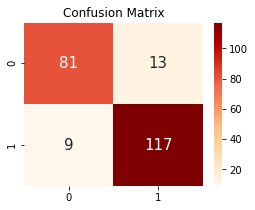

In [33]:
from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

### 8. 긍정, 부정 키워드 분석하기

긍, 부정 키워드를 추출하기 위해 먼저 Logistic Regression 모델에 각 단어의 coeficient를 시각화할 것이다. 

In [34]:
lr.coef_

array([[-0.06428674,  0.20710801,  1.25664013, ..., -0.02068323,
         0.17778402,  0.        ]])

<BarContainer object of 3244 artists>

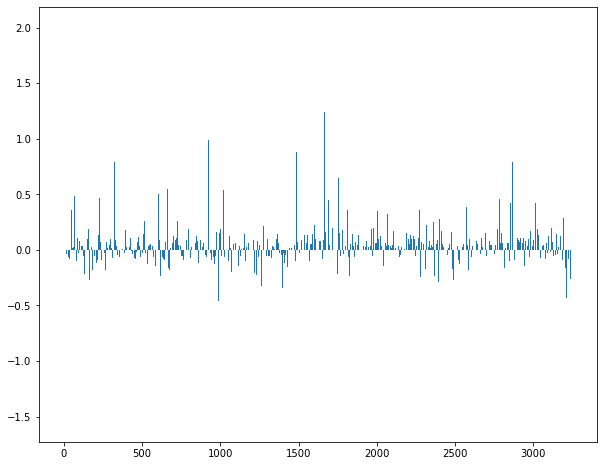

In [35]:
plt.figure(figsize=(10,8))
plt.bar(range(len(lr.coef_[0])),lr.coef_[0])

여기서 계수가 양인 경우는 단어가 긍정적인 영향을 미쳤다고 볼 수 있고, 반면에, 음인 경우는 부정적인 영향을 미쳤다고 볼 수 있다.
출력된 계수들을 크기순으로 정렬하면, 긍, 부정 키워드를 출력할 수 있다. 

In [36]:
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)[-5:])

[(2.0080634558374446, 1443), (1.6493683781461532, 1473), (1.6049043629030266, 194), (1.4081481210374232, 2568), (1.3865132840211045, 2245)]
[(-0.5759934007247252, 185), (-0.5930374331427661, 1341), (-0.6026057802423196, 2333), (-0.7795935340301323, 2807), (-1.5487047086041565, 1115)]


In [37]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = False)
coef_pos_index

[(2.0080634558374446, 1443),
 (1.6493683781461532, 1473),
 (1.6049043629030266, 194),
 (1.4081481210374232, 2568),
 (1.3865132840211045, 2245),
 (1.353016769361995, 275),
 (1.2566401328493124, 2),
 (1.2509125146618685, 1043),
 (1.2391546937716722, 1666),
 (1.18759501991295, 1718),
 (1.1858867148470567, 282),
 (1.1298236216602981, 1760),
 (1.1067338822988708, 377),
 (1.0954203370793496, 862),
 (1.0490223015296067, 2479),
 (1.0423397549907285, 1414),
 (1.035532851732776, 1520),
 (1.0119996300126273, 1376),
 (1.002901242807057, 1457),
 (0.9947669103655581, 727),
 (0.9890741263302414, 924),
 (0.9499946871455927, 2322),
 (0.9327173457685133, 2215),
 (0.8842056949680854, 1487),
 (0.8658723267625587, 358),
 (0.8559742938599497, 347),
 (0.8222582908117361, 1302),
 (0.7933393260488205, 2868),
 (0.7886256284023305, 323),
 (0.7876607204886619, 1439),
 (0.7867298602004098, 2971),
 (0.7692158136098233, 47),
 (0.7651903503754226, 1665),
 (0.7507244433484943, 497),
 (0.7240274919432874, 2400),
 (0.72

In [38]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer           

{2567: '주문',
 1096: '방문',
 2517: '제품',
 1115: '배송',
 2287: '일주일',
 661: '도안',
 2903: '테스트',
 1444: '설겆',
 1487: '세척',
 2479: '정말',
 1535: '손설겆이할때',
 2943: '틈새',
 2982: '편이',
 2476: '정도',
 1310: '뽀드득',
 109: '거리',
 1111: '배달',
 2690: '짬뽕',
 323: '그릇',
 1644: '시나',
 1760: '아주',
 1423: '서나',
 533: '다시',
 123: '걱정',
 202: '고요',
 525: '다만',
 2729: '처음',
 2318: '자동',
 347: '기능',
 1427: '서비스',
 1690: '신청',
 1639: '시간',
 2726: '처리',
 544: '다행',
 1414: '생각',
 1569: '수평',
 2201: '이안',
 983: '문짝',
 106: '거려안',
 2547: '좀더',
 2525: '조금',
 1042: '바램',
 460: '냄새',
 648: '도나',
 2312: '자국',
 2791: '추후',
 206: '고장',
 102: '거나',
 2991: '평이',
 1220: '부분',
 981: '문제',
 2568: '주방',
 2868: '크기',
 1302: '빌트',
 1611: '스텐딩',
 1178: '보기',
 1520: '소음',
 2052: '요타',
 2245: '인용',
 520: '다른',
 2317: '자도',
 2: '가격',
 275: '구매',
 194: '고민',
 1803: '애벌',
 1011: '물헹굼',
 1518: '소요',
 101: '거기',
 2400: '저희',
 2762: '초딩',
 57: '간식',
 351: '기류',
 2332: '자주',
 1213: '부담',
 1462: '성격',
 833: '마무리',
 1456: '설정',
 2582: '주위',
 

In [39]:
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])   #긍정 키워드

설거지 2.0080634558374446
세기 1.6493683781461532
고민 1.6049043629030266
주방 1.4081481210374232
인용 1.3865132840211045
구매 1.353016769361995
가격 1.2566401328493124
바로 1.2509125146618685
식기세척기 1.2391546937716722
싱크대 1.18759501991295
구입 1.1858867148470567
아주 1.1298236216602981
기존 1.1067338822988708
만족 1.0954203370793496
정말 1.0490223015296067
생각 1.0423397549907285
소음 1.035532851732776
삼성 1.0119996300126273
설치 1.002901242807057
디자인 0.9947669103655581


In [40]:
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])    #부정 키워드

배송 -1.5487047086041565
취소 -0.7795935340301323
자체 -0.6026057802423196
사은 -0.5930374331427661
고객 -0.5759934007247252
냄새 -0.5750930114705606
전화 -0.5668115299825766
신청 -0.5516994993393733
판매 -0.54858798132872
문의 -0.511728344850237
엉망 -0.5019278073845092
상품 -0.47543112920462266
별로 -0.47073987107481385
불량 -0.4640815324102326
물건 -0.46222736200764425
자기 -0.4573823756183081
교환 -0.455447296727975
효과 -0.436971851269837
사비 -0.4313456588447138
연락 -0.41750203066504216
